In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn import metrics

import warnings      #to avoid warnings
warnings.filterwarnings('ignore')


df = pd.read_csv('/content/drive/MyDrive/기계학습 팀플/heart_2020_cleaned.csv')
df = df.drop_duplicates()

# 데이터 잘 들어온지 확인
print(df.shape)
df.head()


(301717, 18)


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [ ]:
columns = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']

#label encoding 
df_encoded=df.copy()
le=LabelEncoder()

for i in columns:
    df_encoded[i]=le.fit_transform(df_encoded[i])

genhealth_map = {'Excellent' : 4, 'Very good' : 3, 'Good' : 2, 'Fair' : 1, 'Poor' : 0}


diabetic_map={'Yes' : 2, 'Yes (during pregnancy)' : 2, 'No, borderline diabetes' : 1, 'No' : 0}

age_map = {'18-24' : 20, '25-29' : 25, '30-34' : 30, '35-39' : 35, '40-44' : 40, '45-49' : 45, '50-54' : 50, '55-59' : 55, '60-64' : 60, '65-69' : 65, '70-74' : 70, '75-79' : 75, '80 or older' : 80}

df_encoded['GenHealth'] = df_encoded['GenHealth'].map(genhealth_map)
df_encoded['Diabetic'] = df_encoded['Diabetic'].map(diabetic_map)
df_encoded['AgeCategory'] = df_encoded['AgeCategory'].map(age_map)


# One hot encoding
df_encoded=pd.concat([df_encoded,pd.get_dummies(df_encoded['Race'],prefix='Race',drop_first=True)], axis=1)
df_encoded.drop(columns=['Race'],axis=1,inplace=True)

print(df_encoded.shape)
df_encoded.head()


(301717, 22)


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White
0,0,16.60,1,0,0,3.0,30.0,0,0,55,...,3,5.0,1,0,1,0,0,0,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,80,...,3,7.0,0,0,0,0,0,0,0,1
2,0,26.58,1,0,0,20.0,30.0,0,1,65,...,1,8.0,1,0,0,0,0,0,0,1
3,0,24.21,0,0,0,0.0,0.0,0,0,75,...,2,6.0,0,0,1,0,0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,40,...,3,8.0,0,0,0,0,0,0,0,1


In [ ]:
# x y분리
X=df_encoded.drop('HeartDisease', axis=1)
X_columns=X.columns
Y=df_encoded['HeartDisease']

In [ ]:
# 표준화
df_sc_X=X.copy()
num_cols = ['MentalHealth', 'BMI', 'PhysicalHealth', 'SleepTime']
sc = StandardScaler()
df_sc_X[num_cols] = sc.fit_transform(df_sc_X[num_cols])

df_sc_X

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,...,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White
0,-1.830820,1,0,0,-0.070301,3.183766,0,0,55,2,...,3,-1.420852,1,0,1,0,0,0,0,1
1,-1.252600,0,0,1,-0.438823,-0.507054,0,0,80,0,...,3,-0.057636,0,0,0,0,0,0,0,1
2,-0.287869,1,0,0,2.017986,3.183766,0,1,65,2,...,1,0.623971,1,0,0,0,0,0,0,1
3,-0.654281,0,0,0,-0.438823,-0.507054,0,0,75,0,...,2,-0.739244,0,0,1,0,0,0,0,1
4,-0.731583,0,0,0,3.000709,-0.507054,1,0,40,0,...,3,0.623971,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,-0.159547,1,0,0,0.421060,-0.507054,1,1,60,2,...,1,-0.739244,1,0,0,0,0,1,0,0
319791,0.216141,1,0,0,-0.438823,-0.507054,0,1,35,0,...,3,-1.420852,1,0,0,0,0,1,0,0
319792,-0.649643,0,0,0,-0.438823,-0.507054,0,0,45,0,...,2,-0.739244,0,0,0,0,0,1,0,0
319793,0.675316,0,0,0,-0.438823,-0.507054,0,0,25,0,...,2,3.350402,0,0,0,0,0,1,0,0


In [ ]:
# train test 분리
x_train, x_test, y_train, y_test = train_test_split(df_sc_X,Y,test_size =0.2,random_state = 42)

origin target data :
 No     274456
Yes     27261
Name: HeartDisease, dtype: int64


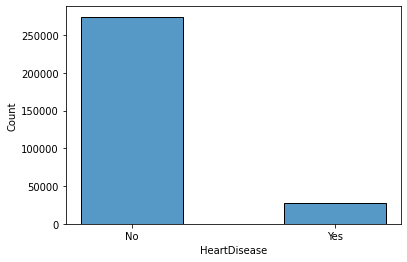

In [ ]:
# 데이터 불균형 처리 전 상태
sns.histplot(data=df, x='HeartDisease', shrink=0.5, multiple='stack')
print('origin target data :\n', df['HeartDisease'].value_counts())

In [ ]:
# 데이터 불균형 처리
from imblearn.under_sampling import *

##언더샘플링

#CNN
x_train_CNN, y_train_CNN =CondensedNearestNeighbour(random_state=42).fit_resample(x_train, y_train) 

#ENN
x_train_ENN, y_train_ENN =EditedNearestNeighbours(kind_sel="all", n_neighbors=5).fit_resample(x_train, y_train) 

#Tomek's link
x_train_Tomek, y_train_Tomek =TomekLinks().fit_resample(x_train, y_train) 

#OSS
x_train_OSS, y_train_OSS =OneSidedSelection(random_state=42).fit_resample(x_train, y_train) 

#NCR
x_train_NCR, y_train_NCR =NeighbourhoodCleaningRule().fit_resample(x_train, y_train) 


#NearMiss<-version1
x_train_NearMiss, y_train_NearMiss=NearMiss().fit_resample(x_train, y_train)


In [ ]:
# 언더 샘플링 결과

print('befor undersampling :\n', y_train.value_counts())
print('\nAfter CNN :\n', y_train_CNN.value_counts())
print('\n\n')

print('befor undersampling :\n', y_train.value_counts())
print('\nAfter ENN :\n', y_train_ENN.value_counts())
print('\n\n')

print('befor undersampling :\n', y_train.value_counts())  
print('\nAfter TomekLink :\n', y_train_Tomek.value_counts())
print('\n\n')

print('befor undersampling :\n', y_train.value_counts()) 
print('\nAfter OSS :\n', y_train_OSS.value_counts())
print('\n\n')

print('befor undersampling :\n', y_train.value_counts())
print('\nAfter NCR :\n', y_train_NCR.value_counts())
print('\n\n')

print('befor undersampling :\n', y_train.value_counts()) 
print('\nAfter NearMiss :\n', y_train_NearMiss.value_counts())
print('\n\n')

befor undersampling :
 0    219562
1     21811
Name: HeartDisease, dtype: int64

After OSS :
 0    212240
1     21811
Name: HeartDisease, dtype: int64



befor undersampling :
 0    219562
1     21811
Name: HeartDisease, dtype: int64

After NCR :
 0    179268
1     21811
Name: HeartDisease, dtype: int64



befor undersampling :
 0    219562
1     21811
Name: HeartDisease, dtype: int64

After NearMiss :
 0    21811
1    21811
Name: HeartDisease, dtype: int64





In [ ]:
# 언더샘플링 결과 Tomeklink #효과 미미 램용량 초과로 다운되어 따로 기록 0=212274, 1=21811

print('befor undersampling :\n', y_train.value_counts())  
print('\nAfter TomekLink :\n', y_train_Tomek.value_counts())
print('\n\n')

befor undersampling :
 0    219562
1     21811
Name: HeartDisease, dtype: int64

After TomekLink :
 0    212274
1     21811
Name: HeartDisease, dtype: int64





In [ ]:
# 데이터 불균형 처리
from imblearn.over_sampling import *


##오버샘플링

#SMOTE
x_train_SMOTE, y_train_SMOTE =SMOTE(random_state=42).fit_resample(x_train, y_train) 

#BorderlineSMOTE
x_train_BorderlineSM, y_train_BorderlineSM =BorderlineSMOTE(random_state=42).fit_resample(x_train, y_train) 

#ADASYN
x_train_ADASYN, y_train_ADASYN =ADASYN(random_state=42).fit_resample(x_train, y_train) 

In [ ]:
#오버 샘플링 결과

print('befor oversampling :\n', y_train.value_counts())
print('\nAfter SMOTE :\n', y_train_SMOTE.value_counts())
print('\n\n')
print('befor oversampling :\n', y_train.value_counts())
print('\nAfter BoderlineSMOTE :\n', y_train_BorderlineSM.value_counts())
print('\n\n')
print('befor oversampling :\n', y_train.value_counts())
print('\nAfter ADASYN :\n', y_train_ADASYN.value_counts())
print('\n\n')



befor oversampling :
 0    219562
1     21811
Name: HeartDisease, dtype: int64

After ADASYN :
 1    221870
0    219562
Name: HeartDisease, dtype: int64



befor oversampling :
 0    219562
1     21811
Name: HeartDisease, dtype: int64

After SMOTE :
 0    219562
1    219562
Name: HeartDisease, dtype: int64



befor oversampling :
 0    219562
1     21811
Name: HeartDisease, dtype: int64

After BoderlineSMOTE :
 0    219562
1    219562
Name: HeartDisease, dtype: int64





In [ ]:
# 복합 샘플링 진행
from imblearn.combine import *

# SMOTETomek
x_train_SMOTETomek, y_train_SMOTETomek =SMOTETomek(random_state=42).fit_resample(x_train, y_train)  

#SMOTETENN
x_train_SMOTEENN, y_train_SMOTEENN =SMOTEENN(random_state=42).fit_resample(x_train, y_train) 



In [ ]:
#복합 샘플링 결과
print('befor combinesampling :\n', y_train.value_counts())
print('\nAfter SMOTETomek :\n', y_train_SMOTETomek.value_counts())
print('\n\n')
print('befor combinesampling :\n', y_train.value_counts())
print('\nAfter SMOTEENN :\n', y_train_SMOTEENN.value_counts())



befor combinesampling :
 0    219562
1     21811
Name: HeartDisease, dtype: int64

After SMOTETomek :
 0    214515
1    214515
Name: HeartDisease, dtype: int64



befor combinesampling :
 0    219562
1     21811
Name: HeartDisease, dtype: int64

After SMOTEENN :
 1    189854
0    161830
Name: HeartDisease, dtype: int64


Accuracy 0.9101650536921649
Precision 0.5119341563786008
Recall 0.11412844036697248
F1 0.18664666166541635
AUC 0.8281532648577425
[[54301   593]
 [ 4828   622]]


Text(83.40000000000006, 0.5, 'true label')

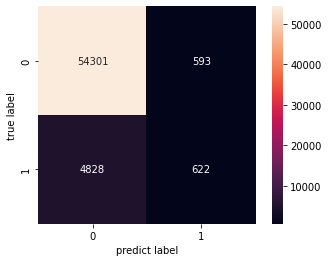

In [ ]:
#로지스틱 이용 샘플링 안한경우
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

acc = metrics.accuracy_score(y_test, y_pred)
prec = metrics.precision_score(y_test, y_pred)
rec = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)
y_pred_proba = model.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# Display confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)


print(f"Accuracy {acc}")
print(f"Precision {prec}")
print(f"Recall {rec}")
print(f"F1 {f1}")
print(f"AUC {auc}")

print(cm)

sns.heatmap(cm, square=True, annot=True, fmt='d', cbar='False')
plt.xlabel('predict label')
plt.ylabel('true label')

In [ ]:
#로지스틱 이용 언더샘플링 CNN 
model = LogisticRegression()
model.fit(x_train_CNN, y_train_CNN)
y_pred = model.predict(x_test)

acc = metrics.accuracy_score(y_test, y_pred)
prec = metrics.precision_score(y_test, y_pred)
rec = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)
y_pred_proba = model.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# Display confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)


print(f"Accuracy {acc}")
print(f"Precision {prec}")
print(f"Recall {rec}")
print(f"F1 {f1}")
print(f"AUC {auc}")

print(cm)

sns.heatmap(cm, square=True, annot=True, fmt='d', cbar='False')
plt.xlabel('predict label')
plt.ylabel('true label')

Accuracy 0.8718348137345884
Precision 0.33870056497175144
Recall 0.44
F1 0.3827613727055068
AUC 0.8289085954816005
[[50212  4682]
 [ 3052  2398]]


Text(83.40000000000006, 0.5, 'true label')

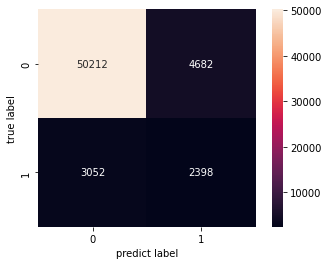

In [ ]:
#로지스틱 이용 언더샘플링 ENN 
model = LogisticRegression()
model.fit(x_train_ENN, y_train_ENN)
y_pred = model.predict(x_test)

acc = metrics.accuracy_score(y_test, y_pred)
prec = metrics.precision_score(y_test, y_pred)
rec = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)
y_pred_proba = model.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# Display confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)


print(f"Accuracy {acc}")
print(f"Precision {prec}")
print(f"Recall {rec}")
print(f"F1 {f1}")
print(f"AUC {auc}")

print(cm)

sns.heatmap(cm, square=True, annot=True, fmt='d', cbar='False')
plt.xlabel('predict label')
plt.ylabel('true label')

Accuracy 0.9089553228158558
Precision 0.4865030674846626
Recall 0.14550458715596332
F1 0.22401129943502826
AUC 0.8276570591595546
[[54057   837]
 [ 4657   793]]


Text(83.40000000000006, 0.5, 'true label')

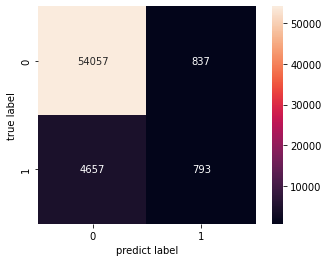

In [ ]:
#로지스틱 이용 언더샘플링 Tomek's Link 
model = LogisticRegression()
model.fit(x_train_Tomek, y_train_Tomek)
y_pred = model.predict(x_test)

acc = metrics.accuracy_score(y_test, y_pred)
prec = metrics.precision_score(y_test, y_pred)
rec = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)
y_pred_proba = model.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# Display confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)


print(f"Accuracy {acc}")
print(f"Precision {prec}")
print(f"Recall {rec}")
print(f"F1 {f1}")
print(f"AUC {auc}")

print(cm)

sns.heatmap(cm, square=True, annot=True, fmt='d', cbar='False')
plt.xlabel('predict label')
plt.ylabel('true label')

Accuracy 0.9087564629457775
Precision 0.48333333333333334
Recall 0.1489908256880734
F1 0.22776998597475456
AUC 0.8269079256334895
[[54026   868]
 [ 4638   812]]


Text(83.40000000000006, 0.5, 'true label')

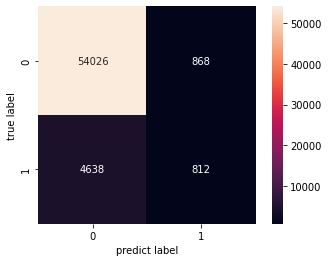

In [ ]:
#로지스틱 이용 언더샘플링 OSS #recall 별로
model = LogisticRegression()
model.fit(x_train_OSS, y_train_OSS)
y_pred = model.predict(x_test)

acc = metrics.accuracy_score(y_test, y_pred)
prec = metrics.precision_score(y_test, y_pred)
rec = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)
y_pred_proba = model.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# Display confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)


print(f"Accuracy {acc}")
print(f"Precision {prec}")
print(f"Recall {rec}")
print(f"F1 {f1}")
print(f"AUC {auc}")

print(cm)

sns.heatmap(cm, square=True, annot=True, fmt='d', cbar='False')
plt.xlabel('predict label')
plt.ylabel('true label')

Accuracy 0.8931791064563172
Precision 0.38686960472512494
Recall 0.3124770642201835
F1 0.3457166057653268
AUC 0.8274342444136707
[[52195  2699]
 [ 3747  1703]]


Text(83.40000000000006, 0.5, 'true label')

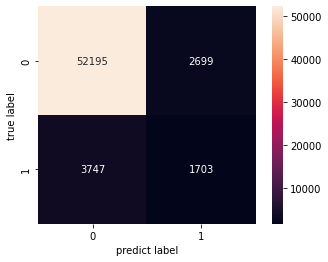

In [ ]:
#로지스틱 이용 언더샘플링 NCR #recall 별로
model = LogisticRegression()
model.fit(x_train_NCR, y_train_NCR)
y_pred = model.predict(x_test)

acc = metrics.accuracy_score(y_test, y_pred)
prec = metrics.precision_score(y_test, y_pred)
rec = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)
y_pred_proba = model.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# Display confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)


print(f"Accuracy {acc}")
print(f"Precision {prec}")
print(f"Recall {rec}")
print(f"F1 {f1}")
print(f"AUC {auc}")

print(cm)

sns.heatmap(cm, square=True, annot=True, fmt='d', cbar='False')
plt.xlabel('predict label')
plt.ylabel('true label')

Accuracy 0.40580670820628395
Precision 0.10921756117622866
Recall 0.7796330275229357
F1 0.19159489561257156
AUC 0.654200355447346
[[20239 34655]
 [ 1201  4249]]


Text(83.40000000000006, 0.5, 'true label')

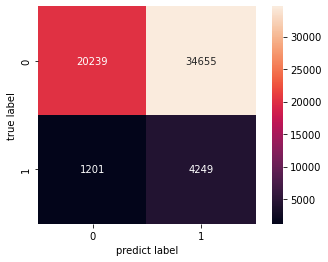

In [ ]:
#로지스틱 이용 언더샘플링 NearMiss-1 #recall 매우큼 그러나 확실히 정보손실이 커보임 성능이 너무 별로
model = LogisticRegression()
model.fit(x_train_NearMiss, y_train_NearMiss)
y_pred = model.predict(x_test)

acc = metrics.accuracy_score(y_test, y_pred)
prec = metrics.precision_score(y_test, y_pred)
rec = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)
y_pred_proba = model.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# Display confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)


print(f"Accuracy {acc}")
print(f"Precision {prec}")
print(f"Recall {rec}")
print(f"F1 {f1}")
print(f"AUC {auc}")

print(cm)

sns.heatmap(cm, square=True, annot=True, fmt='d', cbar='False')
plt.xlabel('predict label')
plt.ylabel('true label')

Accuracy 0.7202538777674665
Precision 0.20649103887433884
Recall 0.7377981651376146
F1 0.32267383541307226
AUC 0.8000138749476473
[[39442 15452]
 [ 1429  4021]]


Text(83.40000000000006, 0.5, 'true label')

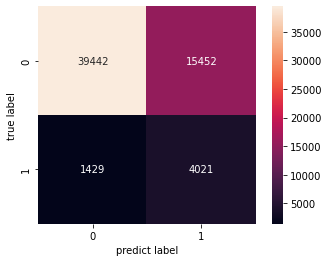

In [ ]:
#로지스틱 이용 오버샘플링 ADASYN
model = LogisticRegression()
model.fit(x_train_ADASYN, y_train_ADASYN)
y_pred = model.predict(x_test)

acc = metrics.accuracy_score(y_test, y_pred)
prec = metrics.precision_score(y_test, y_pred)
rec = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)

y_pred_proba = model.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# Display confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)


print(f"Accuracy {acc}")
print(f"Precision {prec}")
print(f"Recall {rec}")
print(f"F1 {f1}")
print(f"AUC {auc}")

print(cm)

sns.heatmap(cm, square=True, annot=True, fmt='d', cbar='False')
plt.xlabel('predict label')
plt.ylabel('true label')

Accuracy 0.7397752883468116
Precision 0.21765710194415377
Recall 0.725137614678899
F1 0.3348159444232643
AUC 0.8078024068404728
[[40689 14205]
 [ 1498  3952]]


Text(83.40000000000006, 0.5, 'true label')

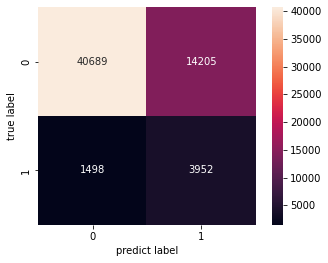

In [ ]:
#로지스틱 이용 오버샘플링 SMOTE
model = LogisticRegression()
model.fit(x_train_SMOTE, y_train_SMOTE)
y_pred = model.predict(x_test)

acc = metrics.accuracy_score(y_test, y_pred)
prec = metrics.precision_score(y_test, y_pred)
rec = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)

y_pred_proba = model.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# Display confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)


print(f"Accuracy {acc}")
print(f"Precision {prec}")
print(f"Recall {rec}")
print(f"F1 {f1}")
print(f"AUC {auc}")

print(cm)

sns.heatmap(cm, square=True, annot=True, fmt='d', cbar='False')
plt.xlabel('predict label')
plt.ylabel('true label')

Accuracy 0.7625944584382871
Precision 0.2300814986011434
Recall 0.6941284403669725
F1 0.34560570071258906
AUC 0.8110839740176481
[[42235 12659]
 [ 1667  3783]]


Text(83.40000000000006, 0.5, 'true label')

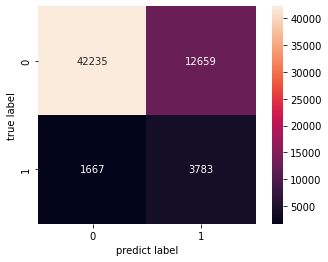

In [ ]:
#로지스틱 이용 오버샘플링 BorderlineSMOTE
model = LogisticRegression()
model.fit(x_train_BorderlineSM, y_train_BorderlineSM)
y_pred = model.predict(x_test)

acc = metrics.accuracy_score(y_test, y_pred)
prec = metrics.precision_score(y_test, y_pred)
rec = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)

y_pred_proba = model.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# Display confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)


print(f"Accuracy {acc}")
print(f"Precision {prec}")
print(f"Recall {rec}")
print(f"F1 {f1}")
print(f"AUC {auc}")

print(cm)

sns.heatmap(cm, square=True, annot=True, fmt='d', cbar='False')
plt.xlabel('predict label')
plt.ylabel('true label')

Accuracy 0.7401067214636087
Precision 0.21468800535325935
Recall 0.7064220183486238
F1 0.3292990634221443
AUC 0.798363521622824
[[40811 14083]
 [ 1600  3850]]


Text(83.40000000000006, 0.5, 'true label')

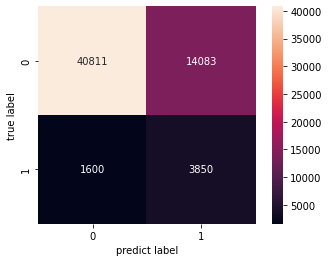

In [ ]:
#로지스틱 이용 SMOTETomek
model = LogisticRegression()
model.fit(x_train_SMOTETomek, y_train_SMOTETomek)
y_pred = model.predict(x_test)

acc = metrics.accuracy_score(y_test, y_pred)
prec = metrics.precision_score(y_test, y_pred)
rec = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)

y_pred_proba = model.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# Display confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)


print(f"Accuracy {acc}")
print(f"Precision {prec}")
print(f"Recall {rec}")
print(f"F1 {f1}")
print(f"AUC {auc}")

print(cm)

sns.heatmap(cm, square=True, annot=True, fmt='d', cbar='False')
plt.xlabel('predict label')
plt.ylabel('true label')

Accuracy 0.6953466790401697
Precision 0.2013760620613225
Recall 0.8001834862385321
F1 0.3217737770235372
AUC 0.8190358031141252
[[37599 17295]
 [ 1089  4361]]


Text(83.40000000000006, 0.5, 'true label')

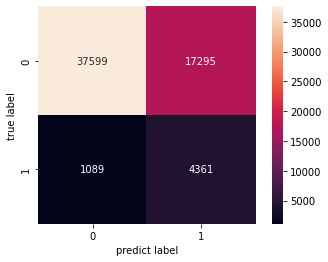

In [ ]:
#로지스틱 이용 SOMTEENN.
model = LogisticRegression()
model.fit(x_train_SMOTEENN, y_train_SMOTEENN)
y_pred = model.predict(x_test)

acc = metrics.accuracy_score(y_test, y_pred)
prec = metrics.precision_score(y_test, y_pred)
rec = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)

y_pred_proba = model.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# Display confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)


print(f"Accuracy {acc}")
print(f"Precision {prec}")
print(f"Recall {rec}")
print(f"F1 {f1}")
print(f"AUC {auc}")

print(cm)

sns.heatmap(cm, square=True, annot=True, fmt='d', cbar='False')
plt.xlabel('predict label')
plt.ylabel('true label')

Accuracy 0.7432884793848601
Precision 0.227191218823018
Recall 0.7671559633027523
F1 0.3505638703726995
AUC 0.8299785006833854
[[40672 14222]
 [ 1269  4181]]


Text(83.40000000000006, 0.5, 'true label')

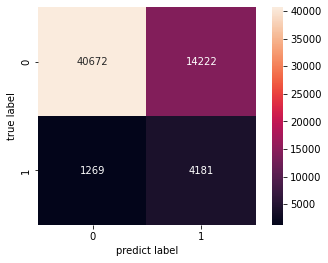

In [ ]:
#원본 데이터를 가지고 class-weight 이용 로지스틱
model = LogisticRegression(class_weight='balanced')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

acc = metrics.accuracy_score(y_test, y_pred)
prec = metrics.precision_score(y_test, y_pred)
rec = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)

y_pred_proba = model.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# Display confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)


print(f"Accuracy {acc}")
print(f"Precision {prec}")
print(f"Recall {rec}")
print(f"F1 {f1}")
print(f"AUC {auc}")

print(cm)

sns.heatmap(cm, square=True, annot=True, fmt='d', cbar='False')
plt.xlabel('predict label')
plt.ylabel('true label')
